In [1]:
from bessyii_devices.keithley import Keithley6514, Keithley6517

kth6517 = Keithley6517("EMILEL:TEST:Keithley01:", name = "kth6517")
kth6514 = Keithley6514("EMILEL:TEST:Keithley00:", name = "kth6514")
kth = kth6517
kth.wait_for_connection()


In [3]:
kth.trig_mode.set("Single")

Status(obj=EpicsSignal(read_pv='SISSY2EX:Keithley02:rbkTrigCont', name='kth6517_trig_mode', parent='kth6517', value='Single', timestamp=1677245464.062901, auto_monitor=False, string=True, write_pv='SISSY2EX:Keithley02:setTrigCont', limits=False, put_complete=False), done=False, success=False)

In [ ]:
kth.scan.get()

In [ ]:
val = kth.read()
kth.stage()
print(val)
status = kth.trigger()

status.wait()

val = kth.read()
print(val)
kth.unstage()


In [ ]:
kth = kth6517

kth.stage()
for i in range(10):

    status = kth.trigger()

    status.wait()

    val = kth.read()
    print(val)

kth.unstage()


In [ ]:
kth.scan.get()


In [9]:

from databroker.v2 import temp
from bluesky.plans import count
from bluesky import RunEngine
from event_model import RunRouter

from bluesky.callbacks.best_effort import BestEffortCallback


RE = RunEngine({})
db = temp()
RE.subscribe(db.v1.insert)


def factory(name, doc):
    # Documents from each run is routed to an independent
    #   instance of BestEffortCallback
    bec = BestEffortCallback()
    return [bec], []

rr = RunRouter([factory])
RE.subscribe(rr)

1

In [7]:
kth = kth6517

kth.scan.set("Passive")
kth.trig_mode.set("Continuous")


Status(obj=EpicsSignal(read_pv='SISSY2EX:Keithley02:rbkTrigCont', name='kth6517_trig_mode', parent='kth6517', value='Single', timestamp=1677245917.173434, auto_monitor=False, string=True, write_pv='SISSY2EX:Keithley02:setTrigCont', limits=False, put_complete=False), done=False, success=False)

In [16]:
kth.init_cmd.set(1)

Status(obj=EpicsSignal(read_pv='SISSY2EX:Keithley02:cmdStart', name='kth6517_init_cmd', parent='kth6517', value=1, timestamp=1677242995.1710067, auto_monitor=False, string=False, write_pv='SISSY2EX:Keithley02:cmdStart', limits=False, put_complete=False), done=False, success=False)



Transient Scan ID: 2     Time: 2023-02-24 14:42:05
Persistent Unique Scan ID: '569e8877-b452-4f9d-afc1-2e62f75d7dff'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |    kth6517 |
+-----------+------------+------------+
|         1 | 14:42:05.7 | 0.0000000384856000 |
|         2 | 14:42:06.3 | 0.0000000385881000 |
|         3 | 14:42:06.8 | 0.0000000384403000 |
|         4 | 14:42:07.2 | 0.0000000385327000 |
+-----------+------------+------------+
generator count ['569e8877'] (scan num: 2)





('569e8877-b452-4f9d-afc1-2e62f75d7dff',)

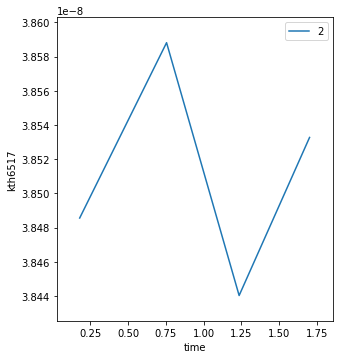

In [11]:
kth = kth6517
kth.nplc.set(5)
kth.trig_mode.set("Single")

import time


RE(count([kth],4))

In [ ]:
run = db[-1]